# Linear and multi-linear regression #

## Linear Regression ##
We can model the linear relationship between two variables by generating a regression line from the data. The regression line tells you how much of the variance in the dependent variable is explained by the independent variable. We want to find the line that best represents the relationship. For a data set X, Y, where X is the independent variable and Y is the dependent variable, we describe the regression line for X, Y as:

$$\hat{y} = mx + b$$

where

$\hat{y}$ = predicted value of y, 
b = intercept, 
m = regression coefficient

The value $\hat{y} - y$ is the residual. If $\hat{y} > y$, then the residual is -, and if $\hat{y} < y$, then the residual is +. The regression line minimizes the sum of the squared residuals. We can calculate $m$ and $b$ as

$$m = r\frac{S_y}{S_x}$$

$$b = \bar{y} - m\bar{x}$$

Once we have the regression line, we can use it for prediction of unobserved values in the data.

For example, in last week's lecture, you generated a linear regression between __Salary__ and __Wins__ to model how well does a team's salary explains the wins they achieve in a season. The plot looked something like this:

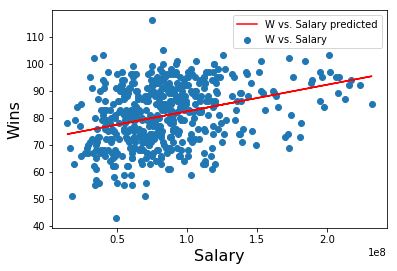

In [32]:
#Linear regression example
#Prediction from one variable
#Need to generate the data. Lahman
from pybaseball.lahman import *
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

sal = salaries()
sal2000 = sal.loc[sal['yearID'] >= 2000].copy()
sal2000.head()
teamSalaries = sal2000.groupby(['yearID', 'teamID'], as_index=False).agg({'salary':'sum'})
teamSalaries.head()

#get wins per season
t = teams()
teams2000 = t.loc[t['yearID'] >= 2000, ['yearID', 'teamID', 'W', 'L', 'attendance']]

#merge wins and salaries data
teamsWinsSalaries = pd.merge(teamSalaries, teams2000, on=['yearID', 'teamID'], how='inner')
teamsWinsSalaries.head()

from scipy import stats
m, b, rval, pval, stderr = stats.linregress(teamsWinsSalaries['salary'], teamsWinsSalaries['W'])
y = m * teamsWinsSalaries['salary'].copy() + b
x = teamsWinsSalaries['salary'].copy()

fig, ax = plt.subplots()
scatter = ax.scatter(x,teamsWinsSalaries['W'],marker='o',label="W vs. Salary")
line = ax.plot(x,y, color='red',label="W vs. Salary predicted")
ax.set_xlabel("Salary", fontsize=16)
ax.set_ylabel("Wins", fontsize=16)
plt.legend()


## Multiple linear regression ##
With multiple linear regression, we use multiple variables to predict a dependent variable. For example, instead of salary as the predictor of wins, we could use a team's salary, ERA, and OBP to predict wins. Each of these independent variables would be assigned a weight that determines how much that variable influences the outcome of the regression for one unit of change in the variable. 

The predicted value for the ith data point is described by:

$$\hat{y_i} = B_0 + B_1x_{i1} + B_2{x_i2}+\cdots+e_i$$

where $e_i$ is the error in the prediction.

What is the predicted number of wins for a team given their team ERA and OBP for a season? Use data since 2010.


In [8]:
tMLR = t.loc[t['yearID']>= 2010, ['yearID', 'teamID', 'W', 'H', 'BB', 'HBP', 'SF', 'ERA', 'AB']]
tMLR.head()
tMLR['OBP'] = (tMLR['H'] + tMLR['BB'] + tMLR['HBP'])/(tMLR['AB'] + tMLR['BB'] + tMLR['HBP'] + tMLR['SF'])
tMLR.head()

,yearID,teamID,W,H,BB,HBP,SF,ERA,AB,OBP
2625,2010,ARI,65,1366,589,39.0,41.0,4.81,5473,0.324650
2626,2010,ATL,91,1411,634,51.0,35.0,3.56,5463,0.338994
2627,2010,BAL,66,1440,424,54.0,45.0,4.59,5554,0.315616
2628,2010,BOS,89,1511,587,47.0,46.0,4.20,5646,0.339077
2629,2010,CHA,88,1467,467,79.0,38.0,4.09,5484,0.331740


In this exercise you'll fit a multiple linear regression model to the ERA, OBP, and Wins data.  PANDAS has a package called [statsmodels](http://www.statsmodels.org/stable/index.html).  We load it as follows.  

In [33]:
#MLR from pandas
#you can also use statsmodels for linear regression
import statsmodels.api as sm 
# Collect the features in a 2D array 
X = tMLR[["ERA", "OBP"]]
# Add a constant to the array for the intercept
#You need a good reason if you don't have an intercept
X = sm.add_constant(X)

# The dependent variable is wins, put in an array 
y = tMLR["W"]

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

#How good is the fit?
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      W   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     330.3
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           3.82e-65
Time:                        21:34:15   Log-Likelihood:                -649.01
No. Observations:                 210   AIC:                             1304.
Df Residuals:                     207   BIC:                             1314.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1648     10.560     -0.205      0.8

# Questions: #
1. Explore how different offensive stats, such as OBP, BA, Plate Appearances, and WAR predict a player's salary. Use a linear and a multi-linear approach.
2. Repeat question 1 for pitchers using valid pitching stats.
3. What do your results tell you about which stats are being valued more in a player's salary?

Note: In pybaseball, there are functions that return the WAR stats for batting and pitching.

More information about batting: <a href="https://github.com/jldbc/pybaseball/blob/master/docs/bwar_bat.md" target="_blank">Batting WAR docs</a>

More information about pitching: <a href="https://github.com/jldbc/pybaseball/blob/master/docs/bwar_pitch.md" target="_blank">Pitching WAR docs</a>


In [10]:
from pybaseball import bwar_bat

# get war stats from baseball reference 
data = bwar_bat()
data.head()

,name_common,mlb_ID,player_ID,year_ID,team_ID,stint_ID,lg_ID,pitcher,G,PA,salary,runs_above_avg,runs_above_avg_off,runs_above_avg_def,WAR_rep,WAA,WAR
0,David Aardsma,430911.0,aardsda01,2004,SFG,1,NL,Y,11,0.0,300000.0,0.0,0.0,0.0,0.0,0.00,0.00
1,David Aardsma,430911.0,aardsda01,2006,CHC,1,NL,Y,43,3.0,NaN,-0.4,-0.4,0.0,0.0,-0.04,-0.04
2,David Aardsma,430911.0,aardsda01,2007,CHW,1,AL,Y,2,0.0,387500.0,0.0,0.0,0.0,0.0,0.00,0.00
3,David Aardsma,430911.0,aardsda01,2008,BOS,1,AL,Y,5,1.0,403250.0,-0.2,-0.2,0.0,0.0,-0.02,-0.02
4,David Aardsma,430911.0,aardsda01,2009,SEA,1,AL,Y,3,0.0,419000.0,0.0,0.0,0.0,0.0,0.00,0.00
